In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.decomposition import FactorAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,  StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

### Податоци

In [2]:
data = pd.read_csv("../data/data.csv")
data = data.drop(["Unnamed: 0","Manufacturer"],axis=1)
print("Number of records = " + str(data.shape[0]))
print("Number of features = " + str(data.shape[1]))
data.head()

Number of records = 378
Number of features = 72


,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,4000,6.53,1,128,1,1,1,0,0,2.0,...,0,0,0,1,0,0,0,0,0,10.085392
1,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.221905
2,1960,4.70,1,32,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,9.897972
3,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.645401
4,1715,4.70,1,16,1,0,1,0,1,1.0,...,0,0,0,0,0,0,0,0,0,10.064671


In [3]:
data.describe()

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
count,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,...,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000,378.000000
mean,3839.119048,6.132751,0.978836,89.968254,0.984127,0.817460,0.825397,0.119048,0.248677,1.939153,...,0.005291,0.034392,0.013228,0.068783,0.129630,0.156085,0.010582,0.182540,0.222222,9.660766
std,730.000661,0.441658,0.144122,88.120601,0.125150,0.386801,0.380130,0.324274,0.432819,0.239365,...,0.072643,0.182474,0.114399,0.253420,0.336341,0.363417,0.102459,0.386801,0.416291,0.738215
min,1715.000000,4.600000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.515191
25%,3370.000000,6.000000,1.000000,32.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.121509
50%,4000.000000,6.260000,1.000000,64.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.512148
75%,4230.000000,6.390000,1.000000,128.000000,1.000000,1.000000,1.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.042815
max,6000.000000,6.780000,1.000000,512.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.013695


In [4]:
boolean_columns = ['Touchscreen', 'Headphones','Face unlock', 'Fingerprint sensor', 'Wireless charging',
       'NFC', '4G/ LTE', '5G','3G', 'EDGE', 'GPRS', 'Wi-Fi', 'VoLTE', 'Bluetooth', 'GPS', 'FM Radio', 'Fast Charging', 'Removable Battery',
       'Card Slot', 'Light Sensor', 'Compass Sensor', 'Proximity Sensor', 'Magnetic Sensor',
       'Gravity Sensor', 'Heathtracking Sensor', 'Gyroscope Sensor', 'Accelerometar Sensor',
       'Vibration Sensor', 'Laser Sensor']
categorical_columns = ['SIM Type', 'Usb Type', 'OS', 'cpuCores', 'Chipset', 'Flash','Launched_Month', 'Launched_Year']
numerical_columns = ['Battery capacity', 'Screen Size', 'Internal storage','Number of SIMs','Expandable storage', 'Price'
                    ,'CPU', 'RAM', 'Rear Camera', 'Front Camera','PPI','Width', 'Height', 'Weight','Number of Rear Cameras','Resolution_x', 
                     'Resolution_y','logPrice']
brand_columns = ['Brand__Coolpad', 'Brand__Google', 
       'Brand__Huawei', 'Brand__Infinix', 'Brand__LG', 'Brand__Lenovo',
       'Brand__Micromax', 'Brand__Motorola', 'Brand__Nokia', 'Brand__OnePlus',
       'Brand__Oppo',  'Brand__Realme', 'Brand__Samsung',
       'Brand__Tecno', 'Brand__Vivo', 'Brand__Xiaomi','Brand__Apple']

## Отстранување на outlierи

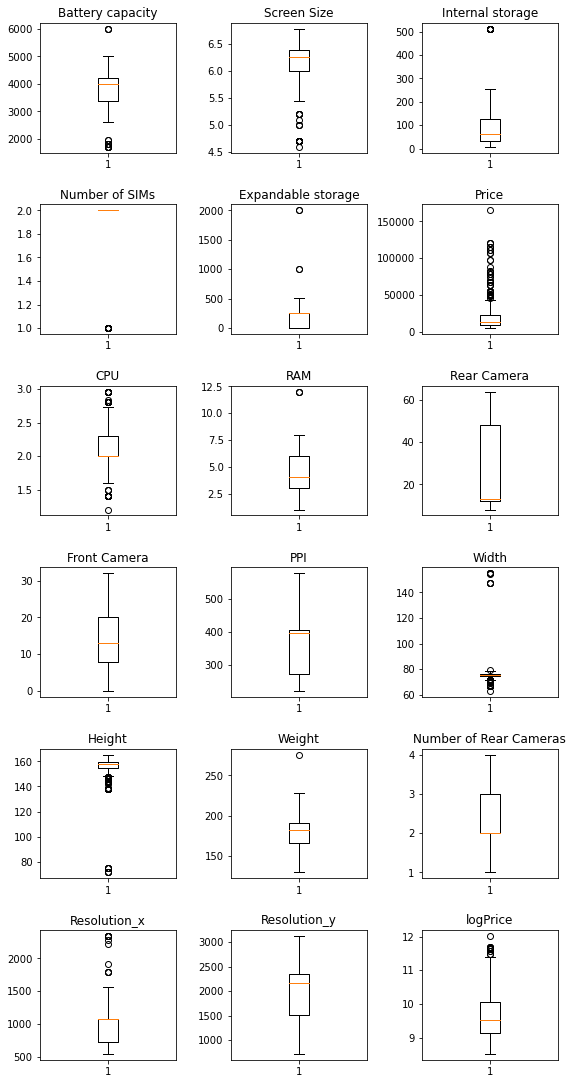

In [5]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.boxplot(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [6]:
for column in numerical_columns:
    data[(np.abs(stats.zscore(data[column])) < 3)].all(axis=1)  #proveri kod
    
print("Number of records after removing outliers = " + str(data.shape[0]))


Number of records after removing outliers = 378


Напиши фенси дека немаме outlierи

## Визуелизации

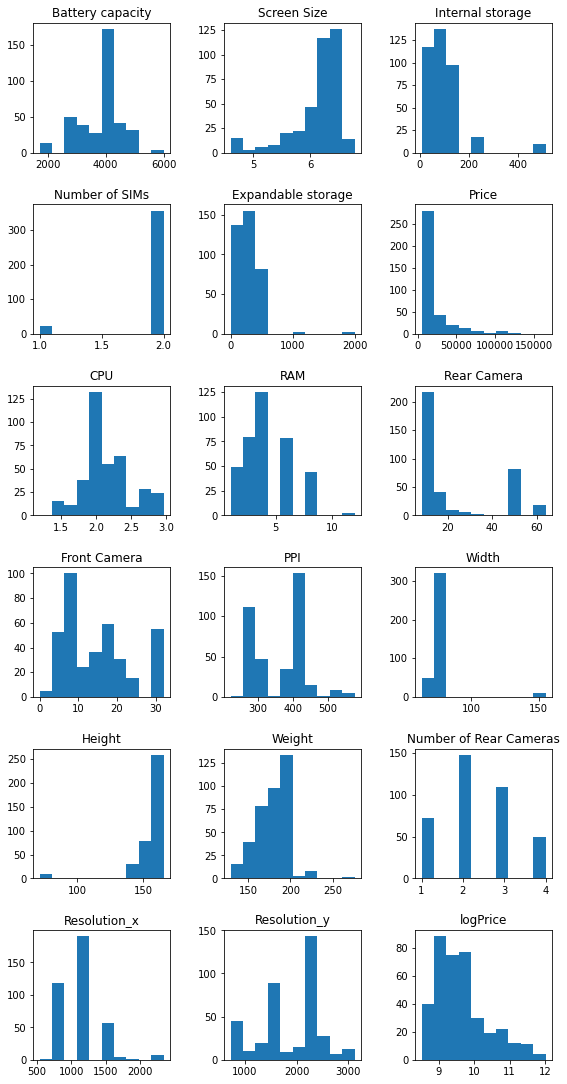

In [7]:
plt.figure(figsize=(9,18))
for i in range(1,len(numerical_columns)+1):
    ax=plt.subplot(6, 3, i)
    ax.hist(data[numerical_columns[i-1]])
    ax.set_title(numerical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

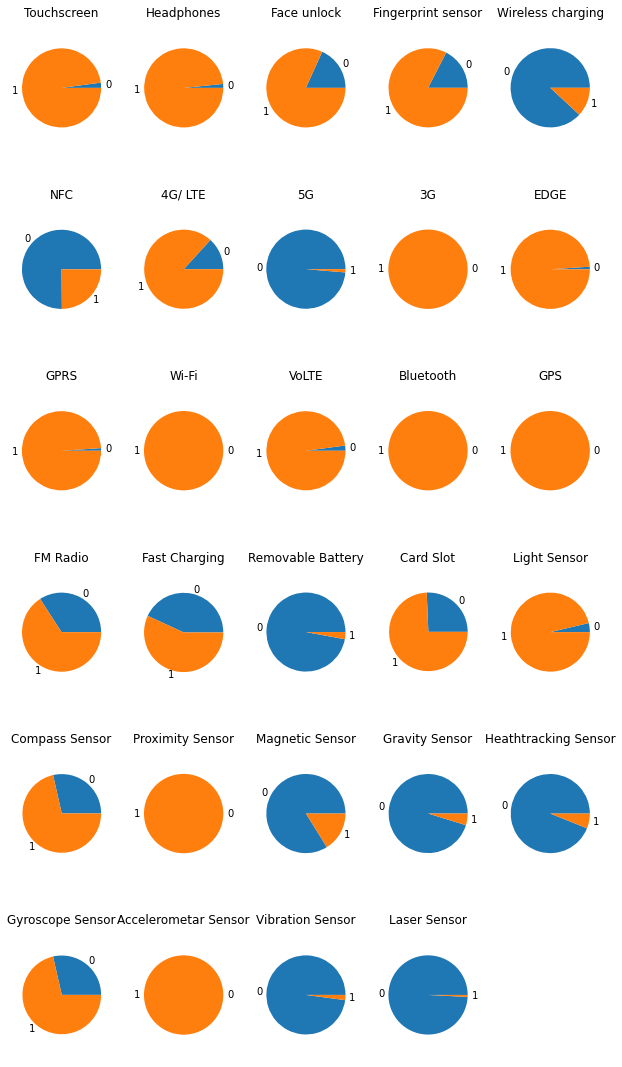

In [8]:
plt.figure(figsize=(10,18))
for i in range(1,len(boolean_columns)+1):
    n = len(data[boolean_columns[i-1]])
    n_1 = sum(data[boolean_columns[i-1]].tolist())
    ax=plt.subplot(6, 5, i)
    patches, texts = ax.pie([n-n_1,n_1],labels=[0,1])
    ax.axis('equal')
    ax.set_title(boolean_columns[i-1])
     
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

Од некои не добиваме никакви информации затоа што сите се сите иста вредност. Имаме и мн со над 90% иста вредност но сега за сега ќе ги оставиме па во процесот на избирање на features за моделите ќе се справиме со нив

In [9]:
to_remove = ['3G', 'Wi-Fi', 'Bluetooth', 'GPS', 'Proximity Sensor', 'Accelerometar Sensor']
data = data.drop(to_remove,axis=1)
for column in to_remove:
    boolean_columns.remove(column)
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 6 features
Updated number of features = 66


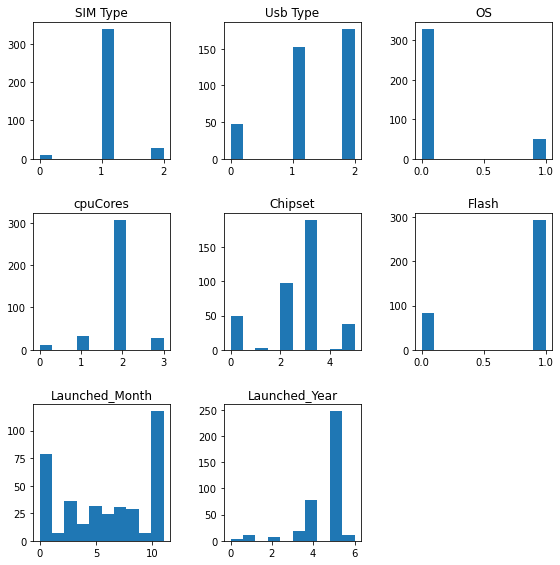

In [10]:
plt.figure(figsize=(9,9))
for i in range(1,len(categorical_columns)+1):
    ax=plt.subplot(3, 3, i)
    ax.hist(data[categorical_columns[i-1]])
    ax.set_title(categorical_columns[i-1])
    
plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4)
plt.show()

In [11]:
correlated_columns = set()
for i in range(len(data.columns)):
    for j in range(i+1,len(data.columns)):
        correlation = data[data.columns[i]].corr(data[data.columns[j]]) 
        if correlation > 0.6:
            correlated_columns.add(data.columns[i])
            correlated_columns.add(data.columns[j])
correlated_columns = list(correlated_columns)

Text(0.5, 1.0, 'Correlation Heatmap')

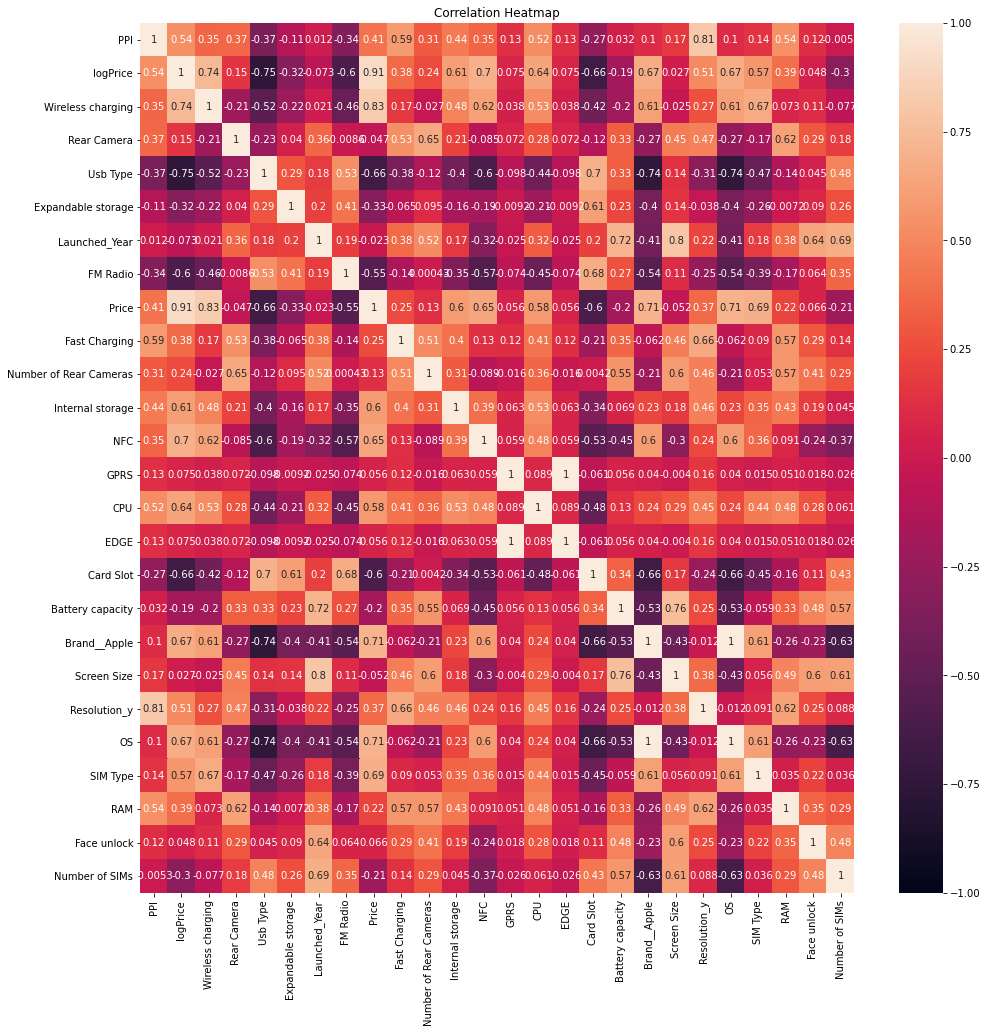

In [12]:
correlated_data = data[correlated_columns]
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(correlated_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12})

In [13]:
to_remove = ['OS', 'EDGE']
data = data.drop(to_remove,axis=1)
boolean_columns.remove('EDGE')
categorical_columns.remove('OS')
print("Removed " + str(len(to_remove)) + " features")
print("Updated number of features = " + str(data.shape[1]))

Removed 2 features
Updated number of features = 64


## Регресија

In [31]:
# data = data.drop(['Price'], axis=1)
data

,Battery capacity,Screen Size,Touchscreen,Internal storage,Headphones,Face unlock,Fingerprint sensor,Wireless charging,NFC,Number of SIMs,...,Brand__Motorola,Brand__Nokia,Brand__OnePlus,Brand__Oppo,Brand__Realme,Brand__Samsung,Brand__Tecno,Brand__Vivo,Brand__Xiaomi,logPrice
0,0.533256,0.885321,1.0,0.238095,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.448821
1,0.057176,0.045872,1.0,0.047619,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487841
2,0.057176,0.045872,1.0,0.047619,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.395249
3,0.000000,0.045872,1.0,0.015873,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608892
4,0.000000,0.045872,1.0,0.015873,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.442898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.299883,0.275229,1.0,0.111111,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291775
374,0.299883,0.275229,1.0,0.047619,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.291775
375,0.276546,0.504587,1.0,0.047619,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
376,0.299883,0.504587,1.0,0.111111,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.084185


In [29]:
features = [x for x in data.columns if x != 'logPrice' ]

In [21]:
scaler = MinMaxScaler()
data[features] = scaler.fit_transform(data[features])

In [22]:
# X_train will include the validation partition
data_train, data_test = train_test_split(data, test_size=0.1, random_state=42)
print(data_train.shape, data_test.shape)

(340, 63) (38, 63)


In [27]:
def my_cv(data_inner, steps=10, use_dim_red=False):
    data_inner = data_inner.sort_values(by=['logPrice'])
    number_of_samples = len(data_inner)
    number_of_batches = 17
    batch_size = number_of_samples // number_of_batches
    list_of_classes = []
    fake_class=1
    counter=0
    for _, _ in data_inner.iterrows():
        if counter > fake_class * batch_size and fake_class < number_of_batches:
            fake_class += 1
        list_of_classes.append(fake_class)
        counter += 1
    print(list_of_classes)
    scores_inner = []
    errors = []
    folder = StratifiedKFold(n_splits=steps)

    splits = folder.split(data_inner, list_of_classes)
    for train_index, val_index in splits:

        training_data = data_inner.iloc[train_index, :]
        validation_data = data_inner.iloc[val_index, :]

        X_train_inner = training_data.drop(['logPrice'], axis=1)
        y_train_inner = training_data['logPrice']

        X_val = validation_data.drop(['logPrice'], axis=1)
        y_val = validation_data['logPrice']

        if use_dim_red:
            fa = FactorAnalysis(n_components=8)
            fa.fit(X_train_inner)
            X_train_inner = fa.transform(X_train_inner)
            X_val = fa.transform(X_val)

        reg_inner = LinearRegression()
        reg_inner.fit(X_train_inner, y_train_inner)
        predictions = reg_inner.predict(X_val)
        score = reg_inner.score(X_val, y_val)
        error = mean_squared_error(predictions, y_val)
        scores_inner.append(score)
        errors.append(error)
        print(score)

    print(f'Scores mean: {np.mean(scores_inner)}')
    print(f'Scores std: {np.std(scores_inner)}')
    print(f'Error mean: {np.mean(errors)}')
    # return np.mean(scores_inner)

print("Plain data")
my_cv(data_train)
print()
print("Using Dimensionality Reduction (Factor Analysis)")
my_cv(data_train, use_dim_red=True)

Plain data
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 1

In [28]:
reg = LinearRegression()
reg.fit(data_train[features], data_train['logPrice'])
pred = reg.predict(data_test[features])

print("Regression score:", reg.score(data_test[features], data_test['logPrice']))
print("Mean square error: ", mean_squared_error(pred, data_test['logPrice']))


Regression score: 0.907729396863673
Mean square error:  0.003667045866069791
